# 12-1 什么是决策树算法？

## 决策树算法思想的直观表示图
+ 在叶子节点的位置其实就是我们最终做出的决策

## 什么是决策树算法

+ 决策树是一个非参数的学习算法  
它不像逻辑回归、SVM 一样能用一个具体的数学表达式来表达模型，类似的非参数学习算法还有 k 近邻算法。
+ 决策树算法可以解决分类问题  
+ 决策树算法天然地可以解决多分类问题  
逻辑回归要使用 ovo 、 ovr 的处理才能解决多分类问题。  
+ 决策树算法也可以解决回归问题  
+ 决策树算法具有非常好的可解释性  
相反地，非近邻算法就不具备可解释性。  

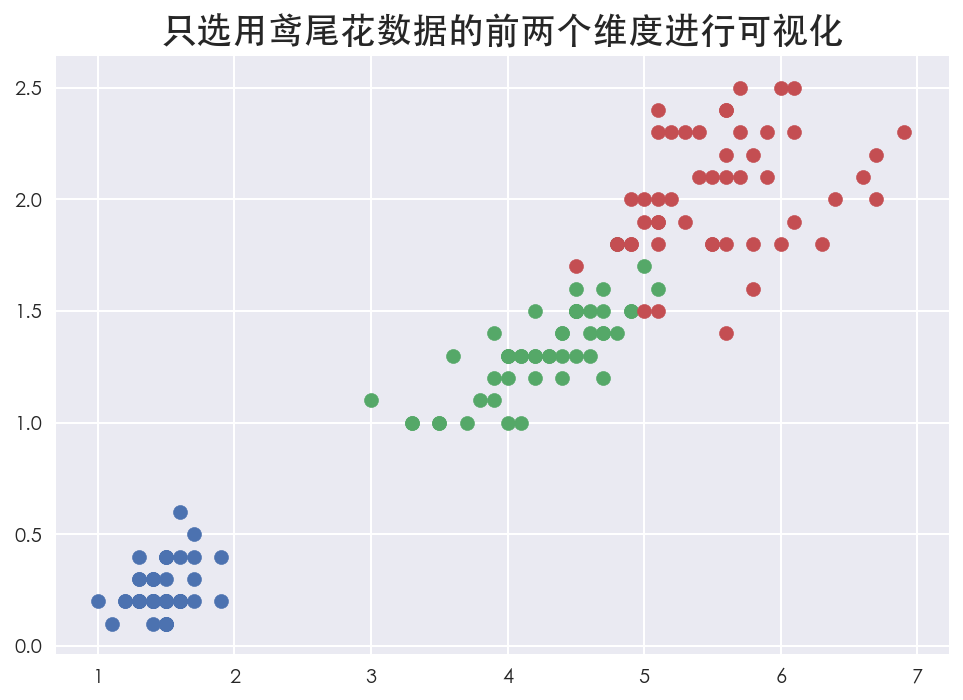

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns

sns.set()
plt.rcParams['font.sans-serif'] = ['STHeiti']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

plt.title("只选用鸢尾花数据的前两个维度进行可视化", fontsize=18)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

## 我们首先看看 scikit-learn 中是如何使用决策树进行分类的

In [2]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

下面画出决策边界。

In [3]:
def plot_decision_boundary(model, axis):

    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int(
            (axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int(
            (axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

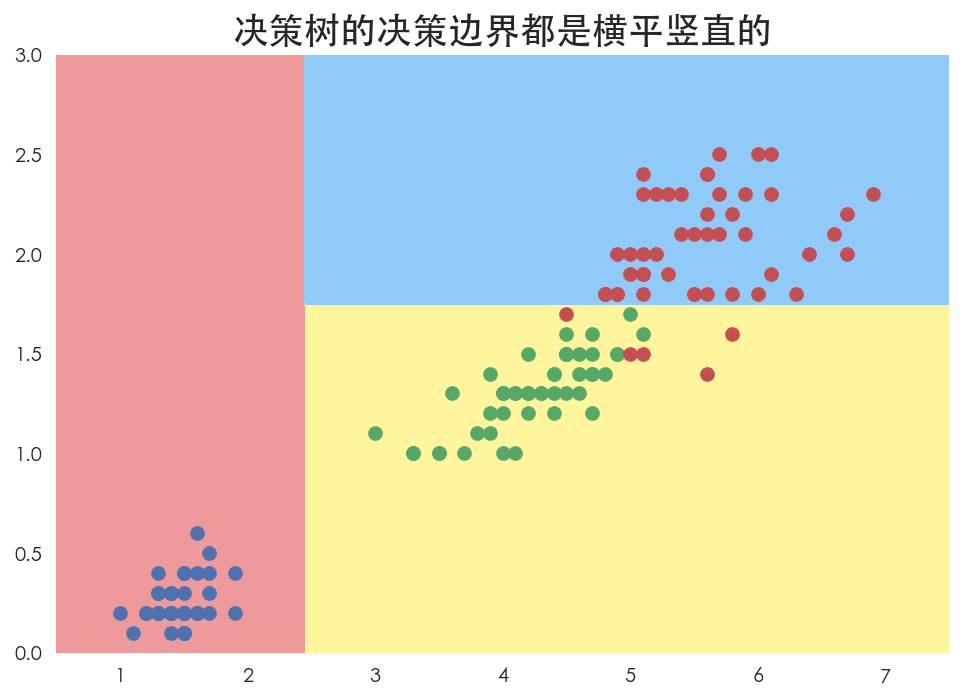

In [6]:
plt.title("决策树的决策边界都是横平竖直的", fontsize=18)
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

## 实现决策树算法的关键问题

+ 在哪个维度上进行划分？
+ 选定了维度以后，划分的边界值是什么？